In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
# From above we can see that distribution of Age is between 18 to 64

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
#There are no missing Values in the data.

In [12]:
df1=df

In [13]:
df1['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
df1.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0, 0.5, 'Count')

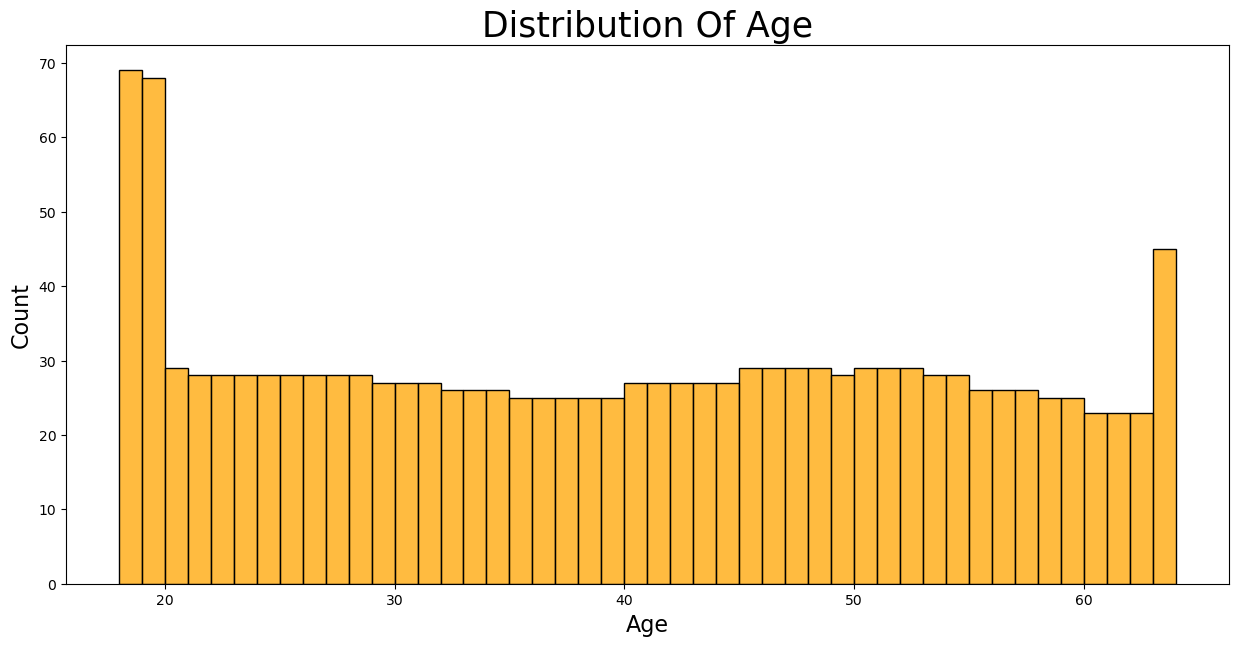

In [15]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=df1,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

<Axes: ylabel='Density'>

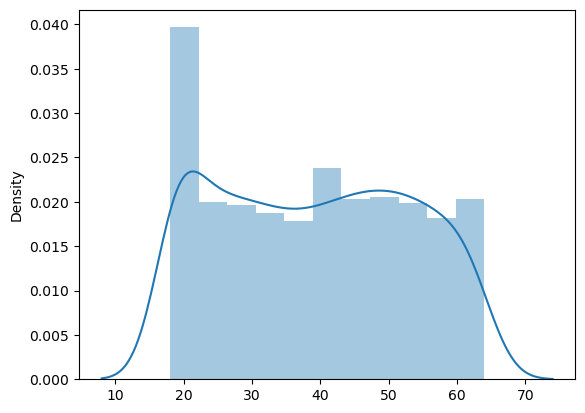

In [16]:
sns.distplot(x=df1['age'])

<Axes: xlabel='age'>

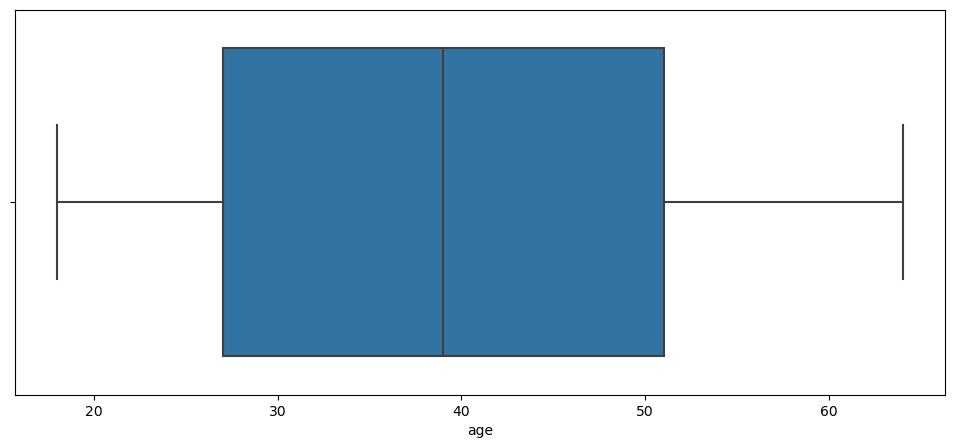

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x='age',data=df1)

Text(0, 0.5, 'Frequency')

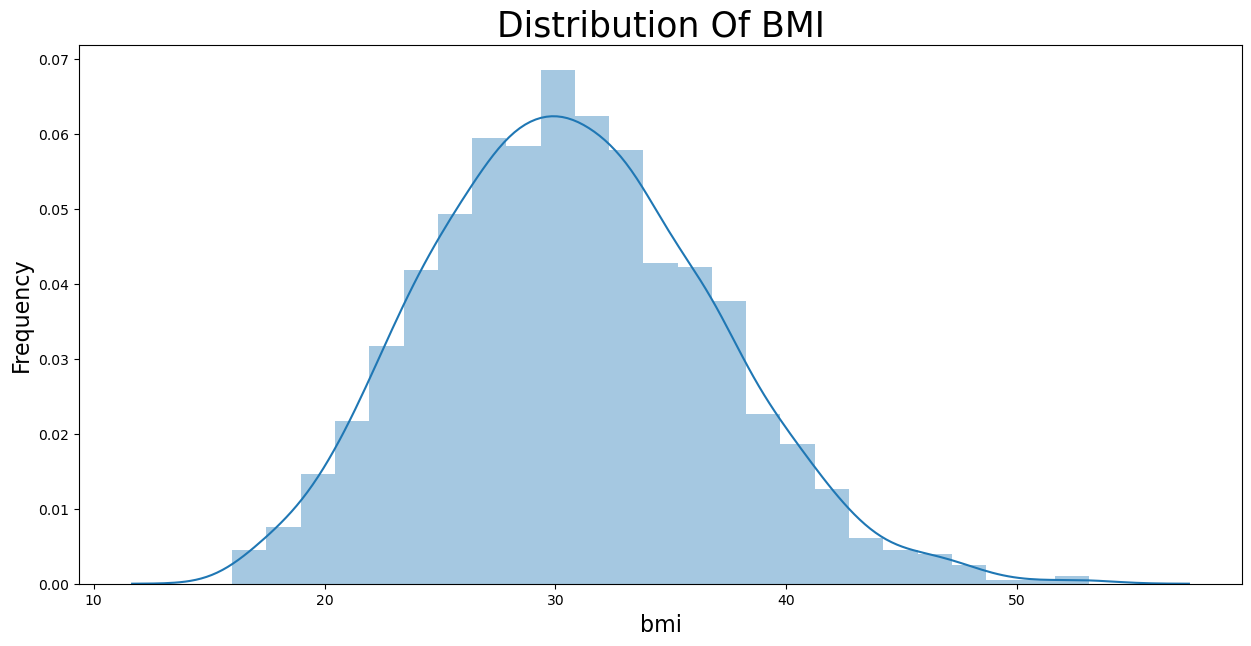

In [18]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df1['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

<Axes: xlabel='bmi'>

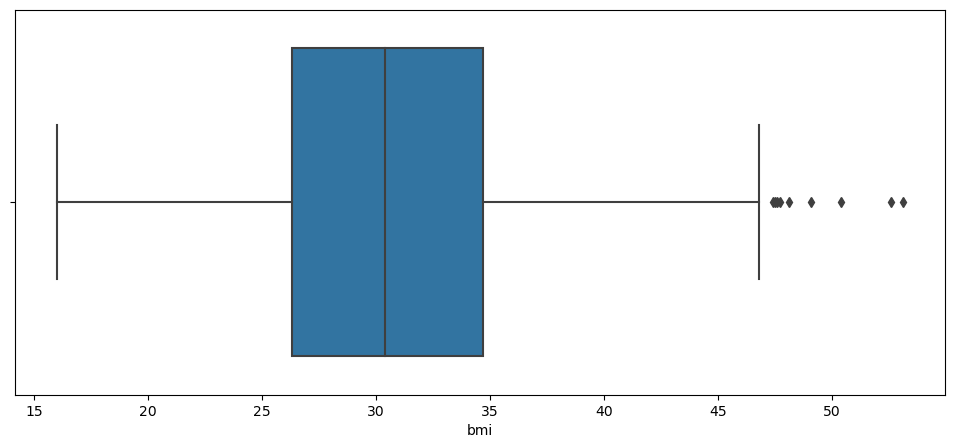

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bmi',data=df1)

In [20]:
# We can see from above barplot that there are some outliers in feature named bmi

<Axes: xlabel='expenses', ylabel='Count'>

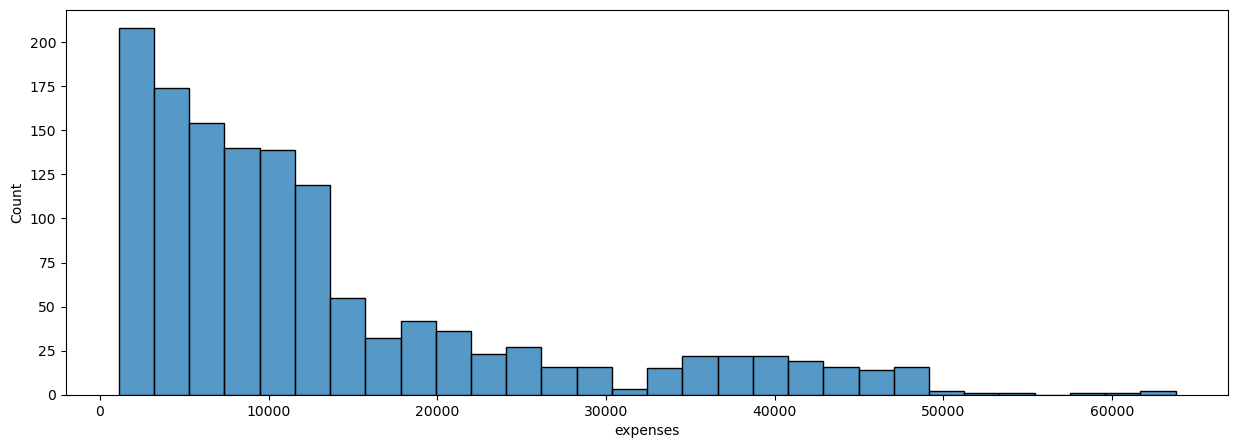

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(x='expenses',data=df1)

<Axes: xlabel='expenses'>

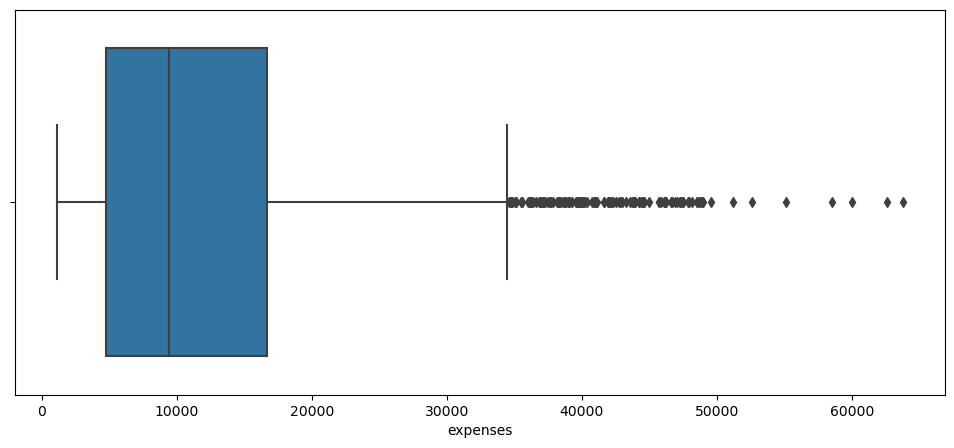

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='expenses',data=df1)

In [23]:
categorical_variables = df1[['smoker', 'sex', 'region']]
target_variable = df1['expenses']

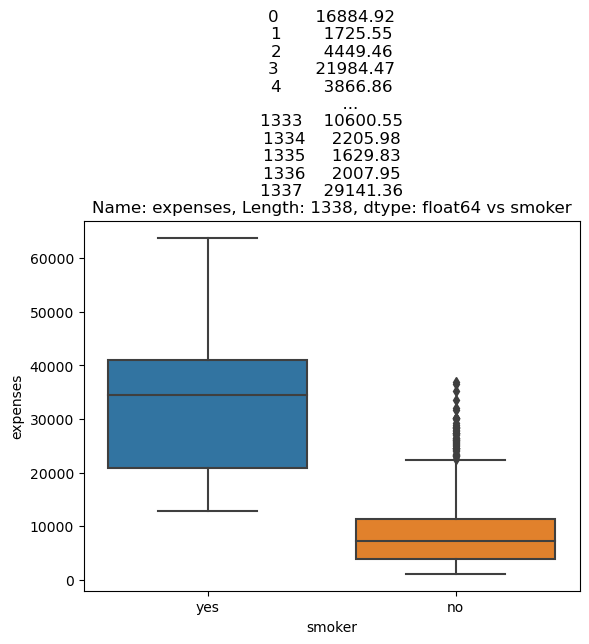

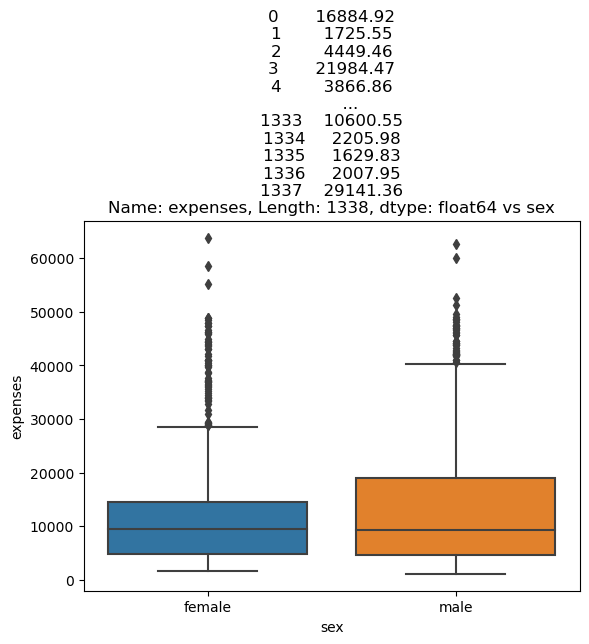

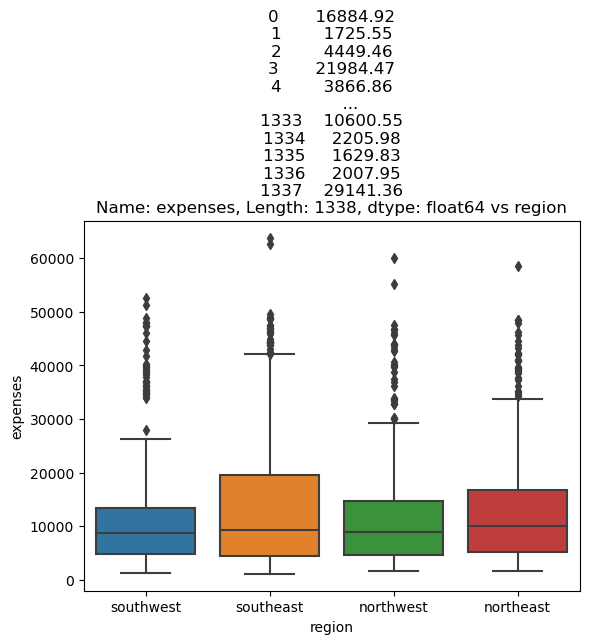

In [24]:
# Create separate plots for each categorical variable
for category in categorical_variables:
    plt.figure()
    sns.boxplot(x=category,y=target_variable,data=df1)
    plt.title(f'{target_variable} vs {category}')
    plt.show()


In [25]:
# From above barplot it is clear that there are some outliers in feature called expenses

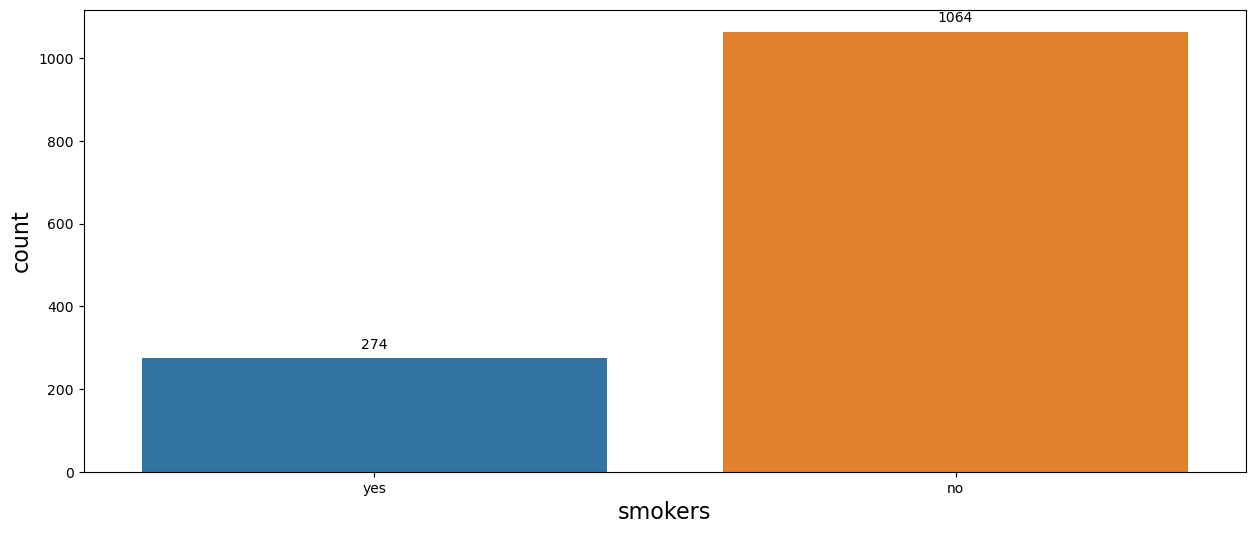

In [26]:
plt.figure(figsize=(15,6))
bp2 = sns.countplot(x='smoker', data=df1)

# Annotate the counts on top of each bar
for p in bp2.patches:
    bp2.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

bp2.set_xlabel("smokers", fontsize=16)
bp2.set_ylabel("count", fontsize=16)
plt.show()

In [27]:
# Non smokers are more compared to smokers

Text(0, 0.5, 'smokers')

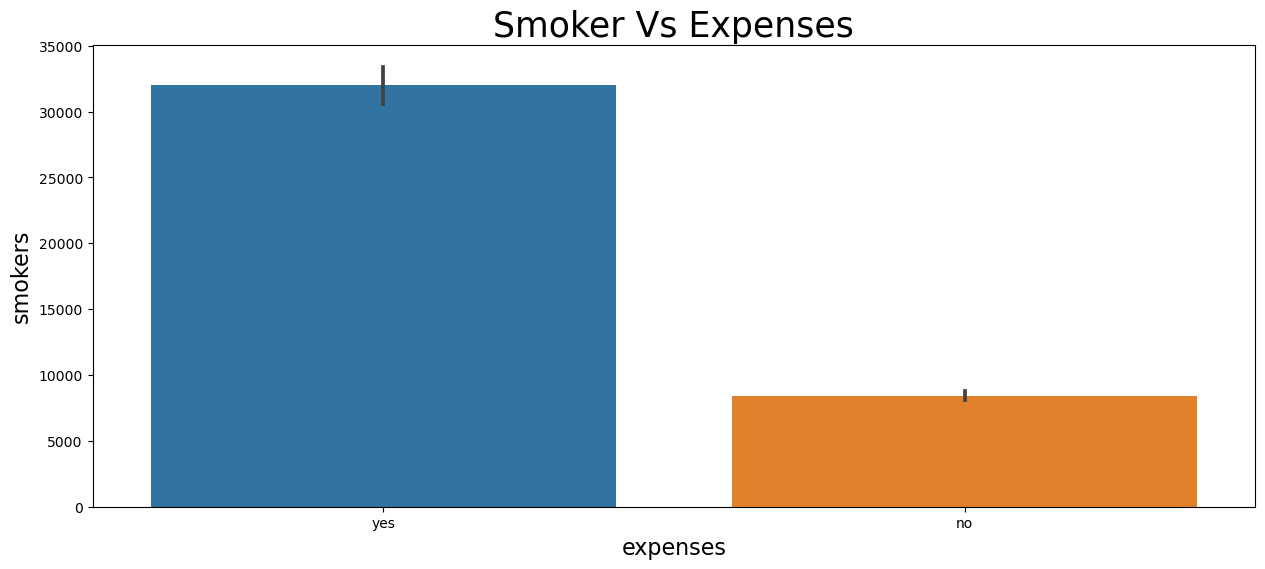

In [28]:
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
bp3=sns.barplot(x='smoker',y='expenses',data=df1)
bp3.set_xlabel("expenses", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

In [29]:
# Expenses of smokers are more as compared to non smokers

Text(0, 0.5, 'expenses')

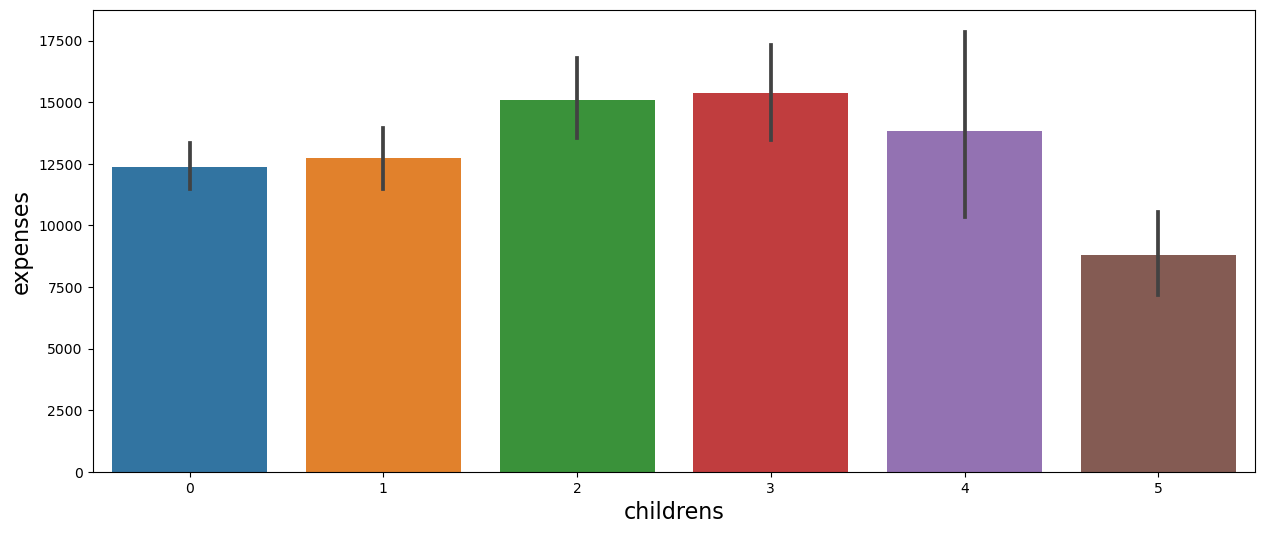

In [30]:
plt.figure(figsize=(15,6))
bp4=sns.barplot(x='children',y='expenses',data=df1)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

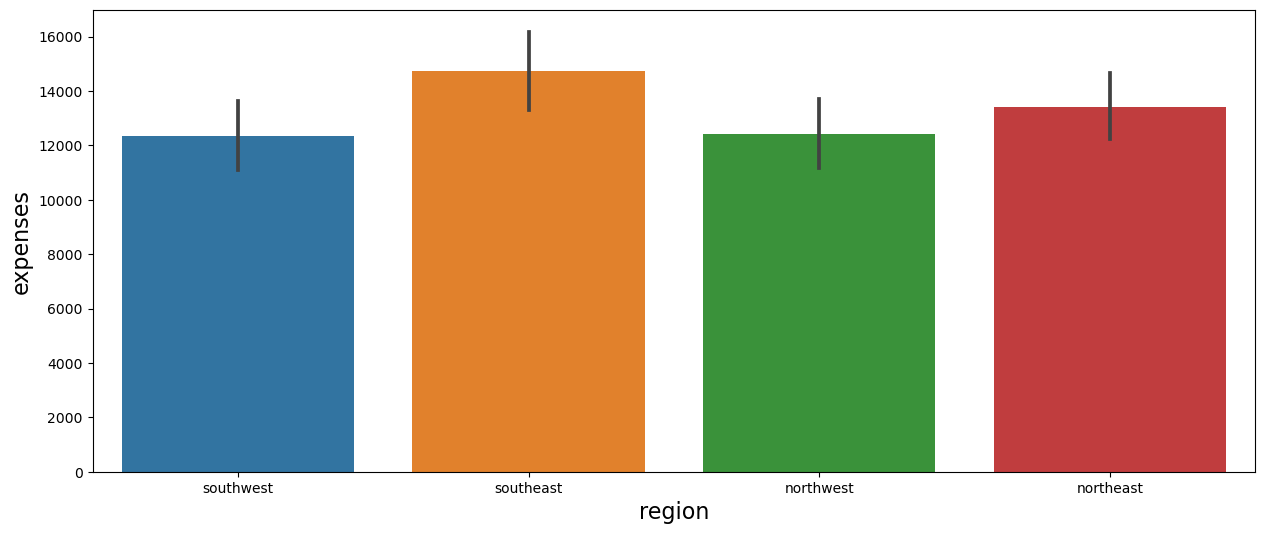

In [31]:
plt.figure(figsize=(15,6))
bp5=sns.barplot(x='region',y='expenses',data=df1)
bp5.set_xlabel("region", fontsize=16)
bp5.set_ylabel("expenses", fontsize=16)

In [32]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0, 0.5, 'count')

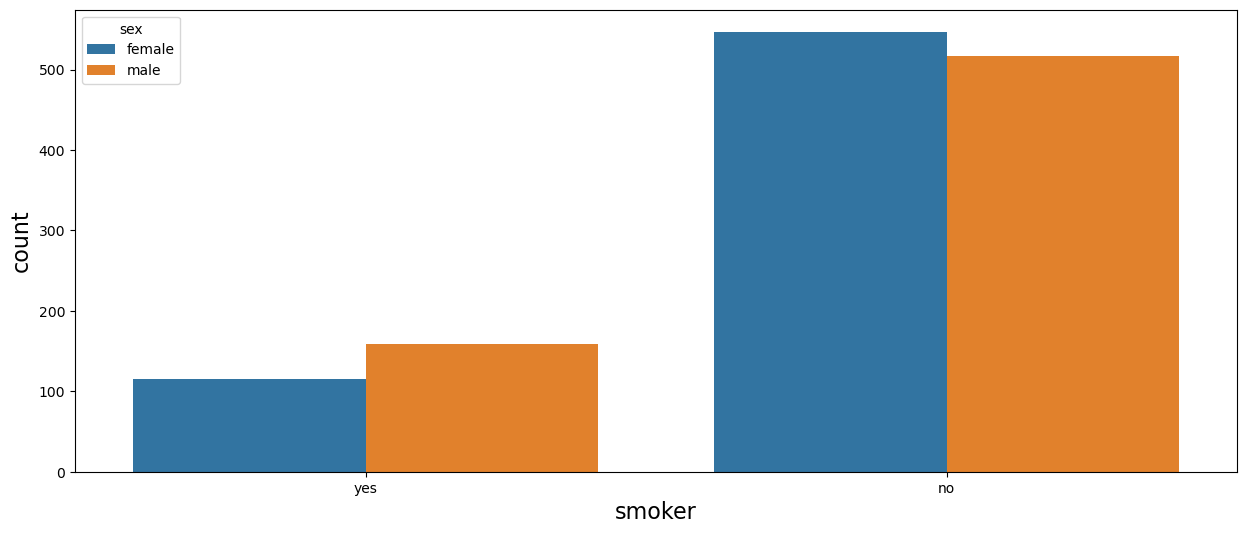

In [33]:
plt.figure(figsize=(15,6))
bp6=sns.countplot(x=df1.smoker,hue=df1.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

In [34]:
# Male smokers are more compared to female. Female Non-smokers are more compared to male.

Text(0, 0.5, 'Expenses')

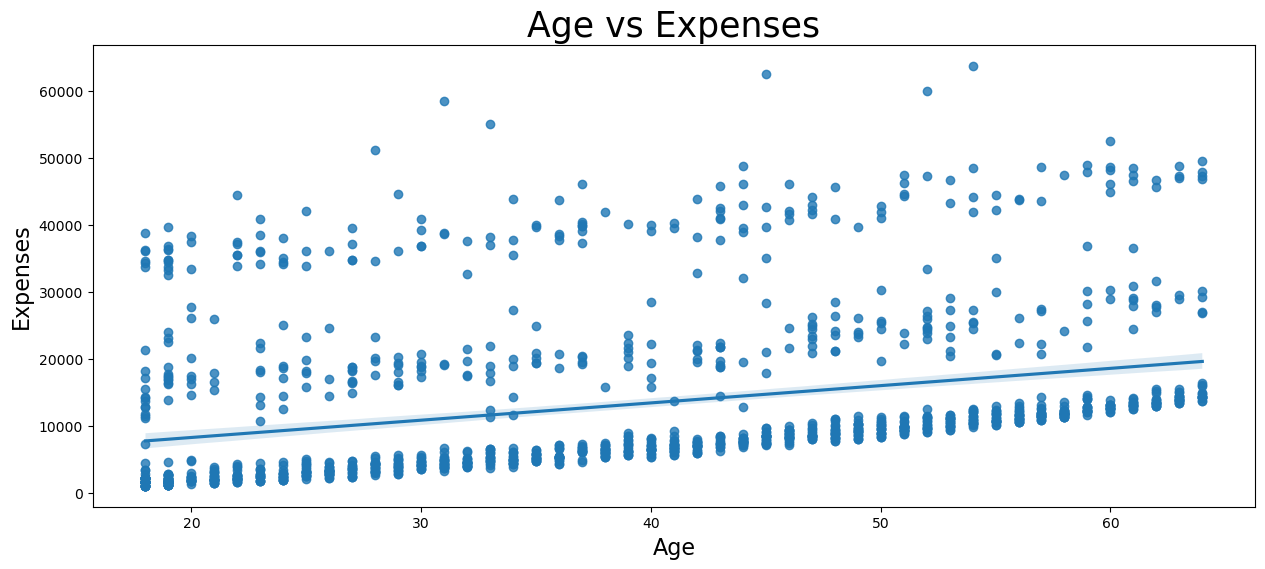

In [35]:
plt.figure(figsize=(15,6))
plt.title("Age vs Expenses",fontsize=25)
bp7=sns.regplot(x='age',y='expenses',data=df1)
bp7.set_xlabel("Age", fontsize=16)
bp7.set_ylabel("Expenses", fontsize=16)

Text(0, 0.5, 'expenses')

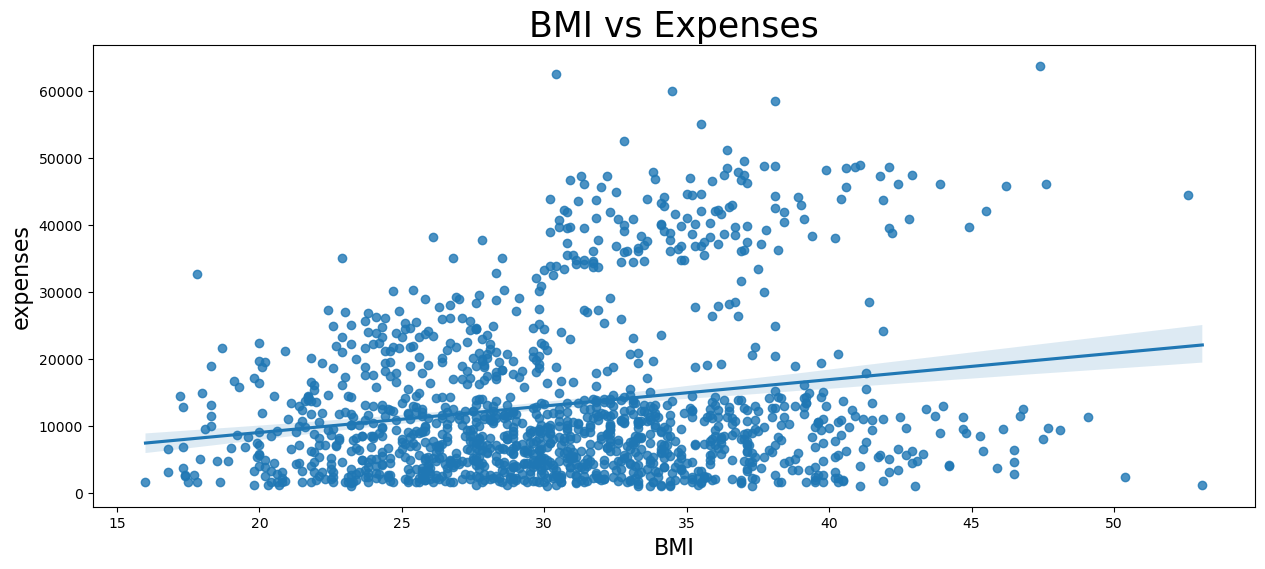

In [36]:
plt.figure(figsize=(15,6))
plt.title("BMI vs Expenses",fontsize=25)
bp8=sns.regplot(x='bmi',y='expenses',data=df1)
bp8.set_xlabel("BMI", fontsize=16)
bp8.set_ylabel("expenses", fontsize=16)

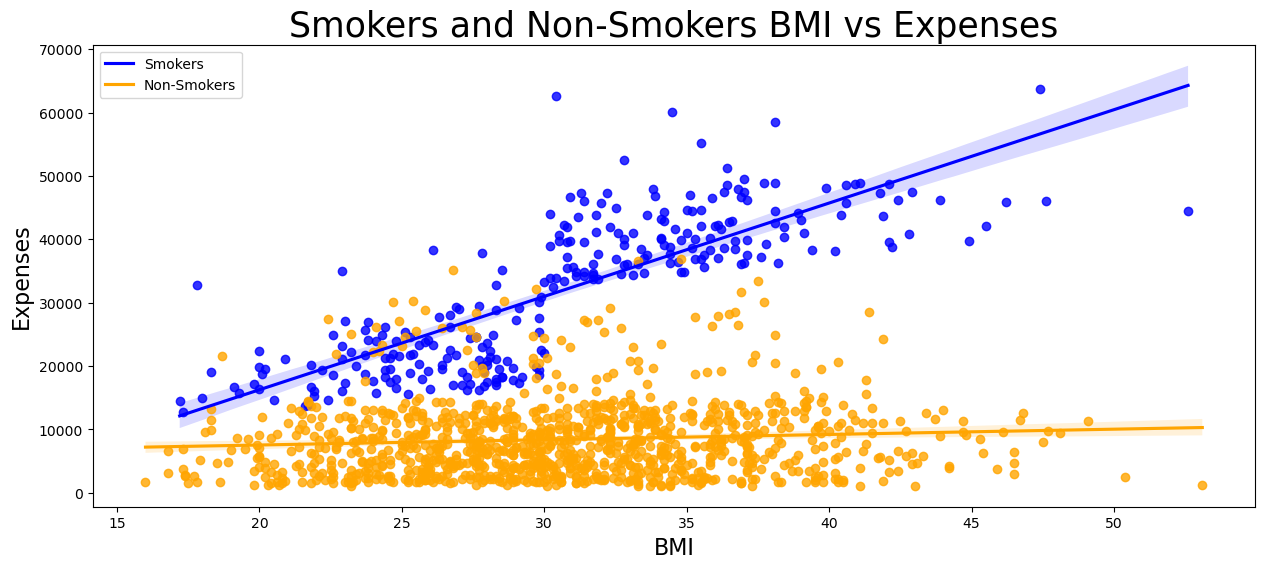

In [37]:
# Create regplot for smokers and non-smokers BMI against expenses
plt.figure(figsize=(15, 6))
plt.title("Smokers and Non-Smokers BMI vs Expenses", fontsize=25)
sns.regplot(x='bmi', y='expenses', data=df1[df1['smoker'] == 'yes'], scatter_kws={'color':'blue'}, line_kws={'label':'Smokers', 'color':'blue'})
sns.regplot(x='bmi', y='expenses', data=df1[df1['smoker'] == 'no'], scatter_kws={'color':'orange'}, line_kws={'label':'Non-Smokers', 'color':'orange'})

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Expenses", fontsize=16)
plt.legend()
plt.show()

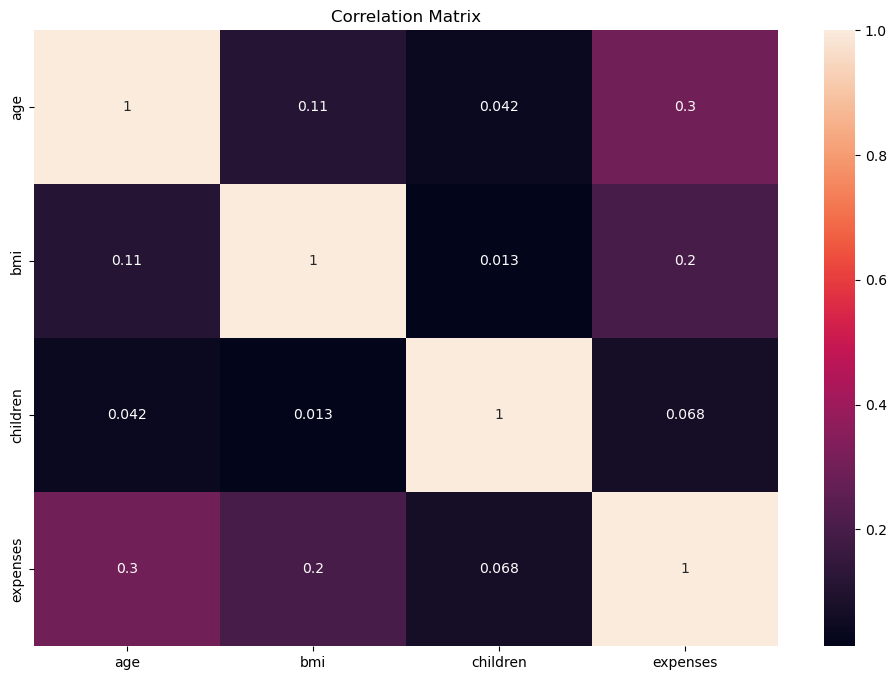

In [38]:
# Select only numeric columns for correlation matrix
df1_numeric = df1.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df1_numeric.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Above correlation and covariance value inform that there exist strong relationship between expenses & AGE (0.3) and expenses & BMI(0.2) for numerical variables

In [40]:
cat_df1 =df1[['sex','smoker','region']]

In [41]:
cat_df1

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [42]:
cat_df1_dummies=pd.get_dummies(cat_df1,drop_first=True)
cat_df1_dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,False,True,False,False,True
1,True,False,False,True,False
2,True,False,False,True,False
3,True,False,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
1333,True,False,True,False,False
1334,False,False,False,False,False
1335,False,False,False,True,False
1336,False,False,False,False,True


In [43]:
df1=pd.concat([df1,cat_df1_dummies],axis=1)
df1

,age,sex,bmi,children,smoker,region,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,16884.92,False,True,False,False,True
1,18,male,33.8,1,no,southeast,1725.55,True,False,False,True,False
2,28,male,33.0,3,no,southeast,4449.46,True,False,False,True,False
3,33,male,22.7,0,no,northwest,21984.47,True,False,True,False,False
4,32,male,28.9,0,no,northwest,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,True,False,True,False,False
1334,18,female,31.9,0,no,northeast,2205.98,False,False,False,False,False
1335,18,female,36.9,0,no,southeast,1629.83,False,False,False,True,False
1336,21,female,25.8,0,no,southwest,2007.95,False,False,False,False,True


In [44]:
df1=df1.drop(['sex','smoker','region'],axis=1)
df1

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,True,False,True,False,False
1334,18,31.9,0,2205.98,False,False,False,False,False
1335,18,36.9,0,1629.83,False,False,False,True,False
1336,21,25.8,0,2007.95,False,False,False,False,True


In [45]:
df1.corr()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109341,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.003968,-0.135992,0.270144,-0.006398
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046380,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003968,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135992,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270144,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006398,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [46]:
cor=df1.corr()

<Axes: >

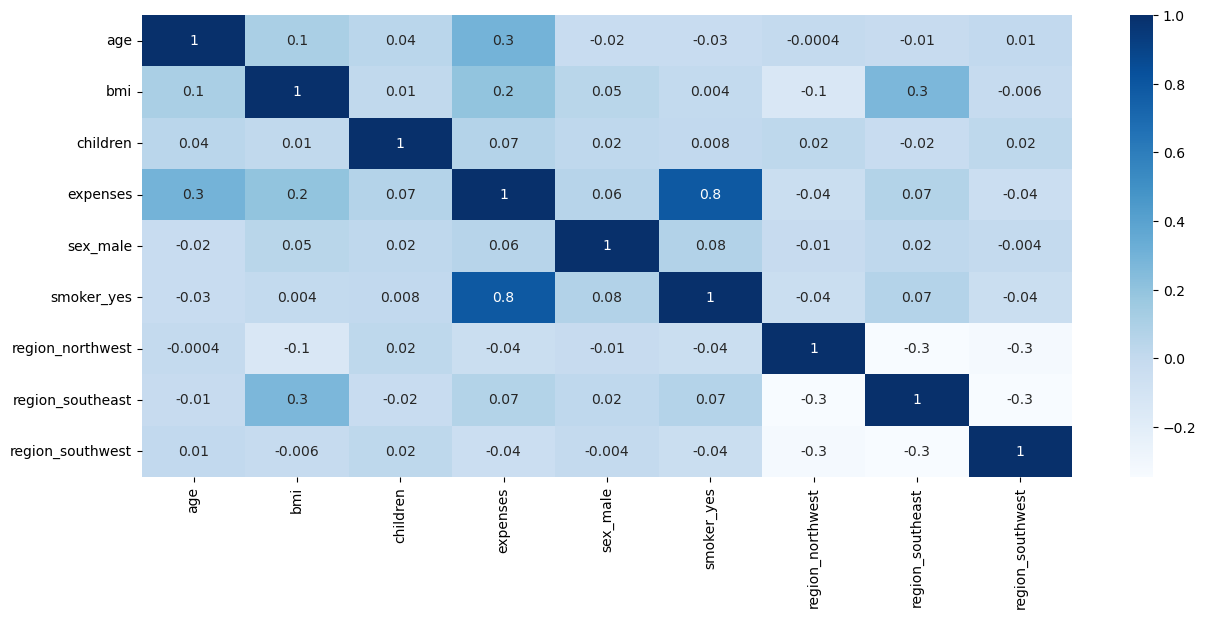

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',annot = True, cmap='Blues')

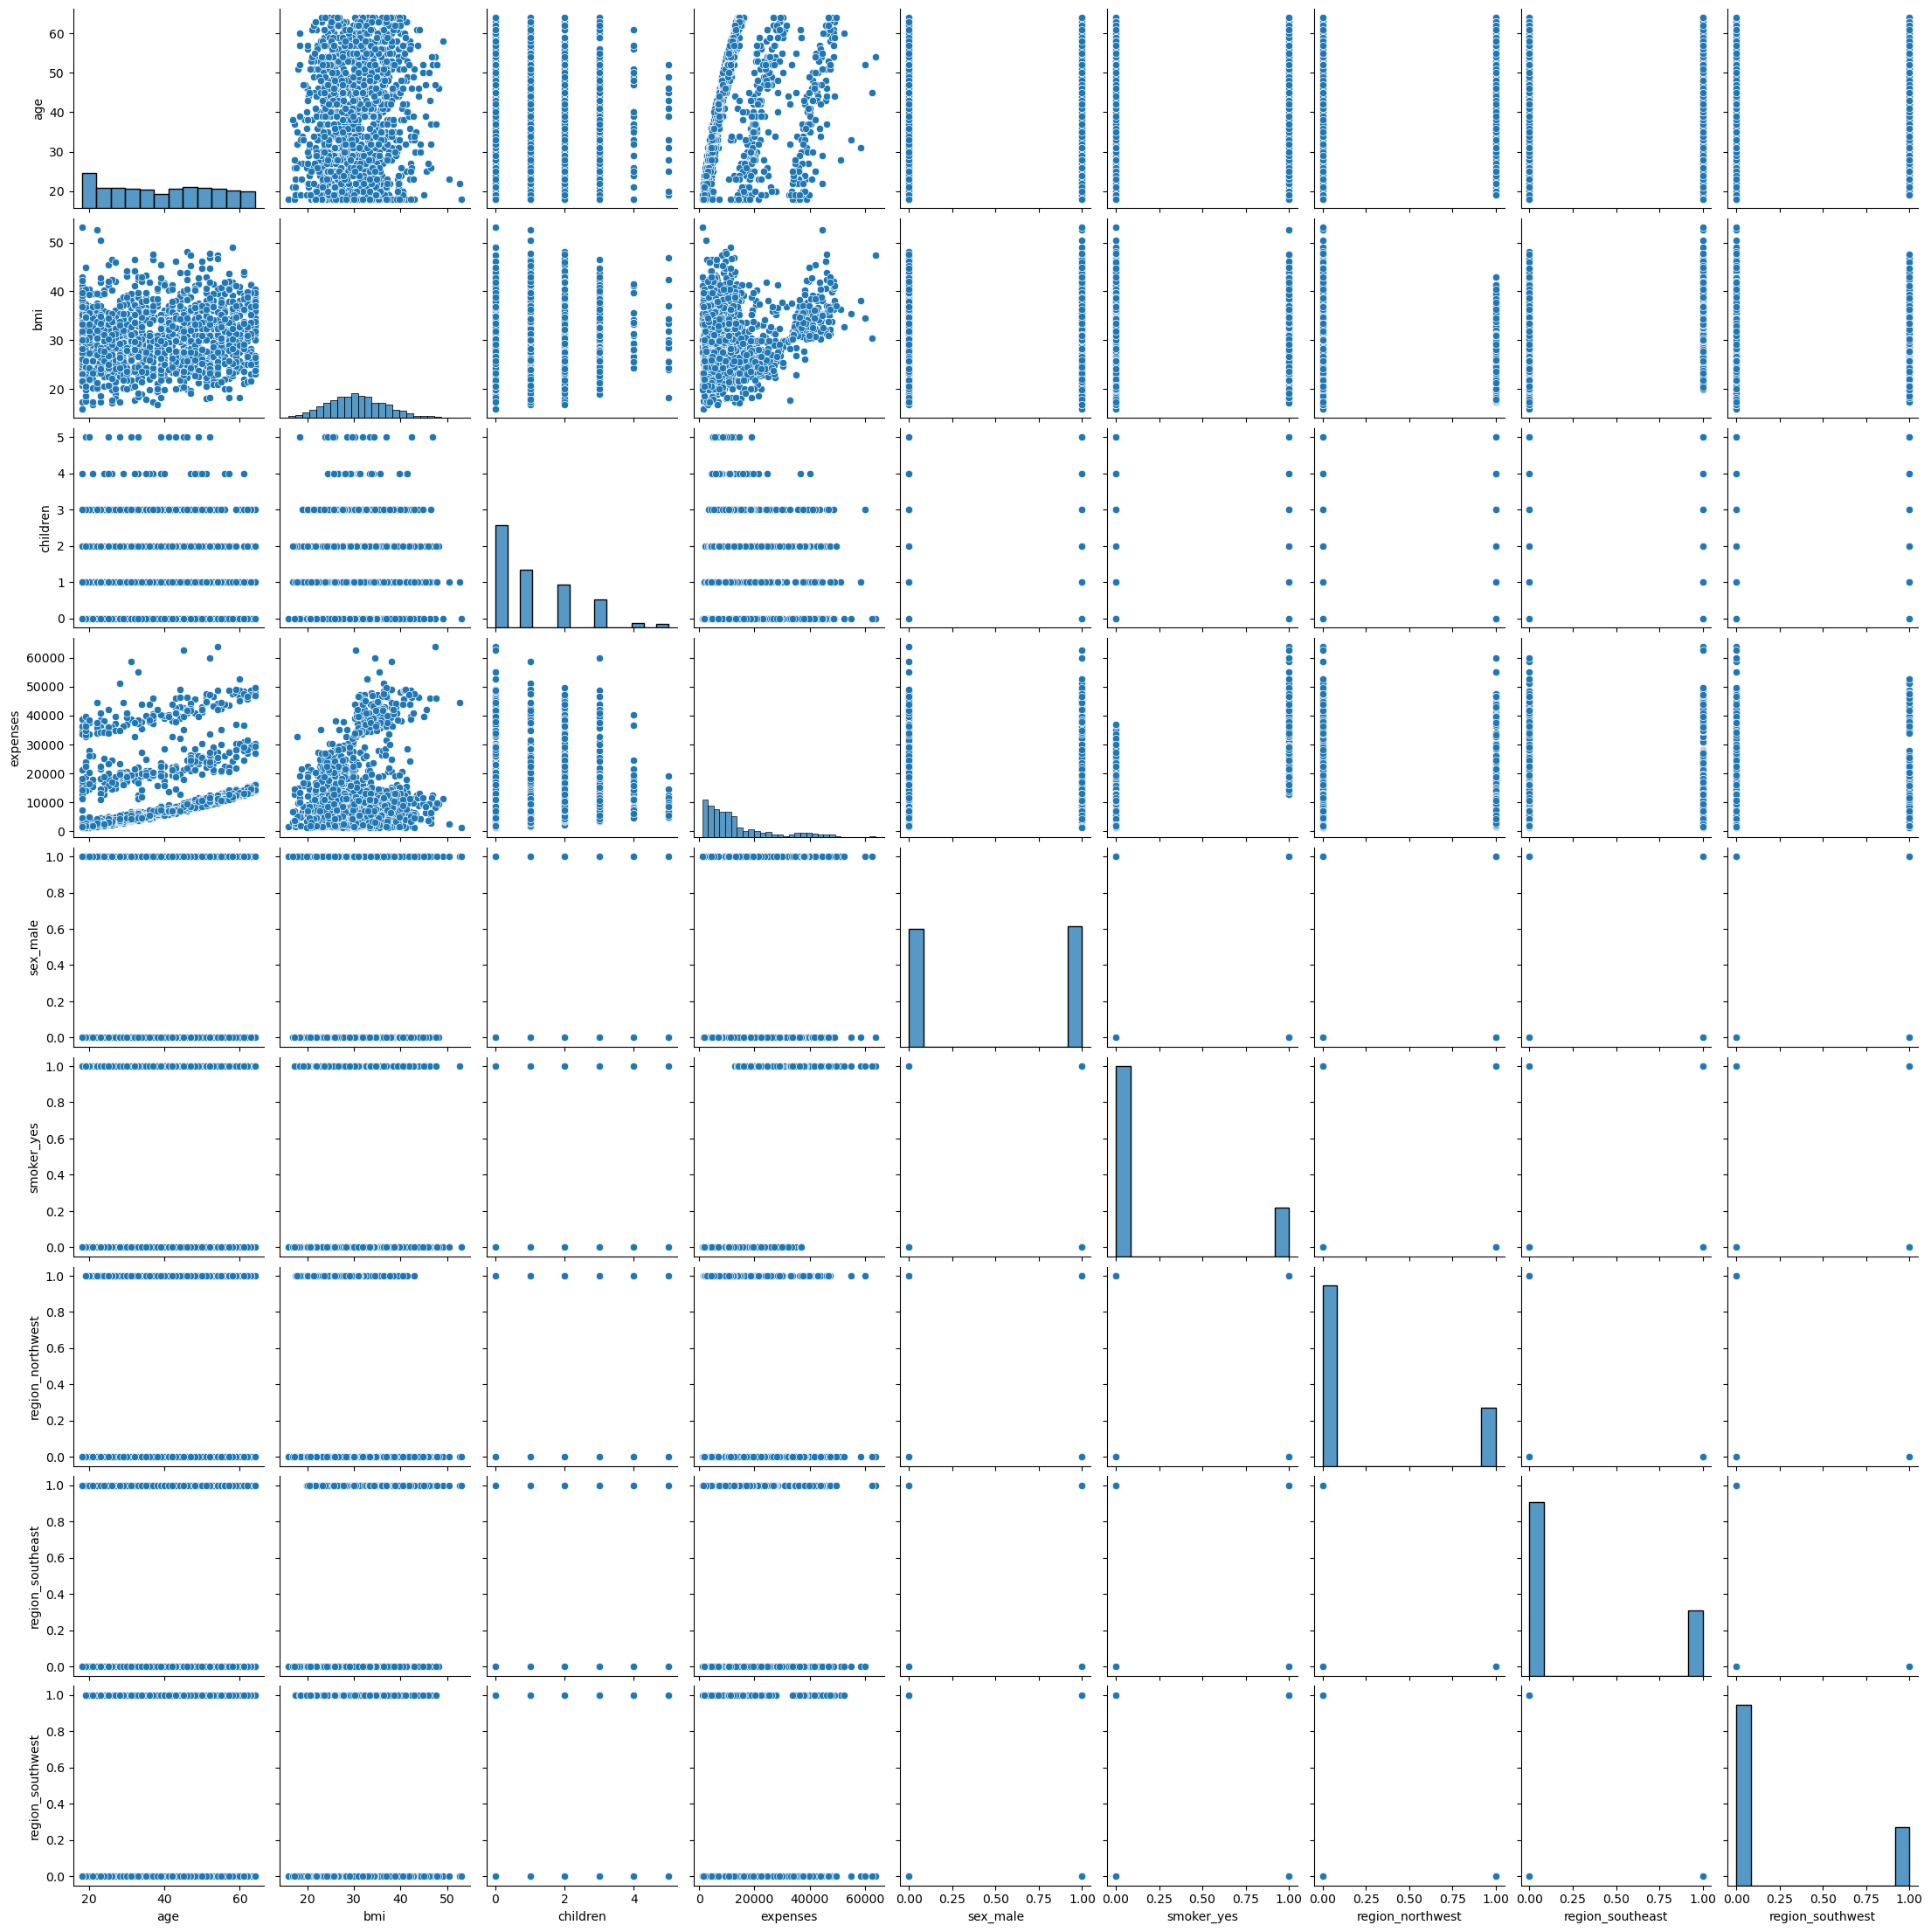

In [48]:
sns.pairplot(data=df1)

In [49]:
cdf=df1[['age','bmi','children']]

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(cdf)
df2=pd.DataFrame(scaler.transform(cdf),columns=cdf.columns)

In [51]:
df2

,age,bmi,children
0,0.021739,0.320755,0.0
1,0.000000,0.479784,0.2
2,0.217391,0.458221,0.6
3,0.326087,0.180593,0.0
4,0.304348,0.347709,0.0
...,...,...,...
1333,0.695652,0.404313,0.6
1334,0.000000,0.428571,0.0
1335,0.000000,0.563342,0.0
1336,0.065217,0.264151,0.0


In [52]:
df1=df1.drop(['age','bmi','children'],axis=1)

In [53]:
df1=pd.concat([df1,df2],axis=1)

In [54]:
df1

,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,16884.92,False,True,False,False,True,0.021739,0.320755,0.0
1,1725.55,True,False,False,True,False,0.000000,0.479784,0.2
2,4449.46,True,False,False,True,False,0.217391,0.458221,0.6
3,21984.47,True,False,True,False,False,0.326087,0.180593,0.0
4,3866.86,True,False,True,False,False,0.304348,0.347709,0.0
...,...,...,...,...,...,...,...,...,...
1333,10600.55,True,False,True,False,False,0.695652,0.404313,0.6
1334,2205.98,False,False,False,False,False,0.000000,0.428571,0.0
1335,1629.83,False,False,False,True,False,0.000000,0.563342,0.0
1336,2007.95,False,False,False,False,True,0.065217,0.264151,0.0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   expenses          1338 non-null   float64
 1   sex_male          1338 non-null   bool   
 2   smoker_yes        1338 non-null   bool   
 3   region_northwest  1338 non-null   bool   
 4   region_southeast  1338 non-null   bool   
 5   region_southwest  1338 non-null   bool   
 6   age               1338 non-null   float64
 7   bmi               1338 non-null   float64
 8   children          1338 non-null   float64
dtypes: bool(5), float64(4)
memory usage: 48.5 KB


In [56]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming df1 is your dataset after preparing it for modeling

# Convert boolean columns to integers
bool_cols = df1.select_dtypes(include=['bool']).columns
df1[bool_cols] = df1[bool_cols].astype(int)

# Check Data Types and Convert to Numeric if Necessary
df1 = df1.apply(pd.to_numeric, errors='coerce')

# Handle Missing Values
df1 = df1.dropna()

# Split Data into Training and Testing Sets
X = df1.drop(columns=['expenses'])  # Features
y = df1['expenses']  # Target variable

# Ensure there are no non-numeric columns
print(X.dtypes)
print(y.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the OLS Model
X_train_sm = sm.add_constant(X_train)  # Add constant term for intercept

# Check for any remaining issues in the data
print(X_train_sm.head())

model = sm.OLS(y_train, X_train_sm).fit()

# Print model summary
print(model.summary())


sex_male              int32
smoker_yes            int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
age                 float64
bmi                 float64
children            float64
dtype: object
float64
      const  sex_male  smoker_yes  region_northwest  region_southeast  \
621     1.0         1           1                 0                 0   
194     1.0         1           0                 0                 1   
240     1.0         0           1                 0                 0   
1168    1.0         1           0                 0                 0   
1192    1.0         0           0                 0                 0   

      region_southwest       age       bmi  children  
621                  1  0.413043  0.487871       0.8  
194                  0  0.000000  0.495957       0.0  
240                  0  0.108696  0.557951       0.4  
1168                 1  0.304348  0.517520       0.4  
1192                 0  0.869565  0.4420

In [57]:
# --- Checking Assumptions ---

In [59]:
# 1. Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
print("VIF Data:")
print(vif_data)

VIF Data:
            feature        VIF
0             const  12.824096
1          sex_male   1.006068
2        smoker_yes   1.014539
3  region_northwest   1.542841
4  region_southeast   1.695840
5  region_southwest   1.578679
6               age   1.021601
7               bmi   1.117796
8          children   1.010008


In [60]:
# 2. Autocorrelation using Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.9938225057855892


In [61]:
# 3. Heteroscedasticity using White's General Test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
white_test_results = dict(zip(labels, white_test))
print("White's General Test:")
print(white_test_results)

White's General Test:
{'Test Statistic': 114.71161437785858, 'Test Statistic p-value': 3.836014109979058e-10, 'F-Statistic': 3.4456464617795146, 'F-Test p-value': 8.131969793636917e-11}


Final Data Shape: (1193, 9)
Final Data Head:
        age       bmi  children  expenses  sex_male  smoker_yes  \
0 -1.421407 -0.358107 -0.892872  0.957833 -0.975980    2.764946   
1 -1.492543  0.648043 -0.070327 -1.133609  1.024611   -0.361671   
2 -0.781184  0.511616  1.574764 -0.757808  1.024611   -0.361671   
3 -0.425504 -1.244882 -0.892872  1.661386  1.024611   -0.361671   
4 -0.496640 -0.187573 -0.892872 -0.838186  1.024611   -0.361671   

   region_northwest  region_southeast  region_southwest  
0         -0.586062         -0.582190          1.760584  
1         -0.586062          1.717653         -0.567993  
2         -0.586062          1.717653         -0.567993  
3          1.706305         -0.582190         -0.567993  
4          1.706305         -0.582190         -0.567993  
                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.604
Model:                            OLS   Adj. R

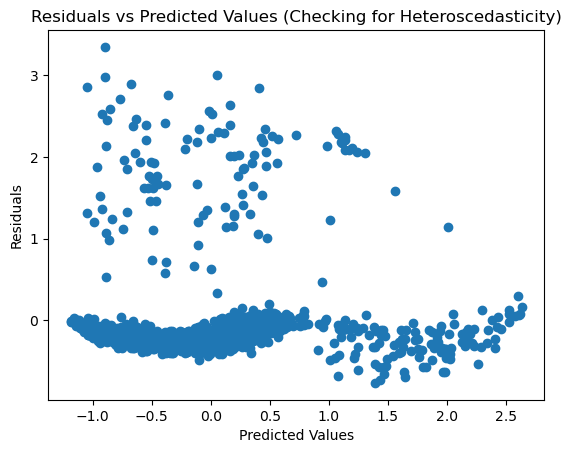


Breusch-Pagan test results:
F-statistic: 16.512019023931014
P-value: 0.035611071252170744

Durbin-Watson statistic: 2.0628434933448934


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Print the final data shape and head
print("Final Data Shape:", df_cleaned_scaled.shape)
print("Final Data Head:")
print(df_cleaned_scaled.head())

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS Model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X)

# Plot residuals vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          6.07e-183
Time:                        11:05:09   Log-Likelihood:                -925.16
No. Observations:                 954   AIC:                             1868.
Df Residuals:                     945   BIC:                             1912.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0086      0.021  

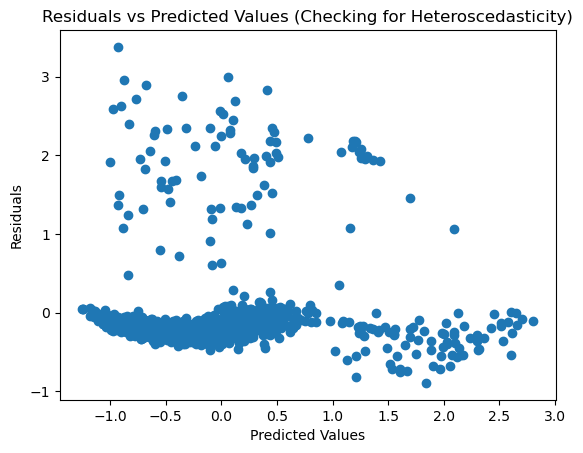


Breusch-Pagan test results:
F-statistic: 19.421803332571955
P-value: 0.012759537405438922

Durbin-Watson statistic: 2.041920209197732


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS Model on the training data
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

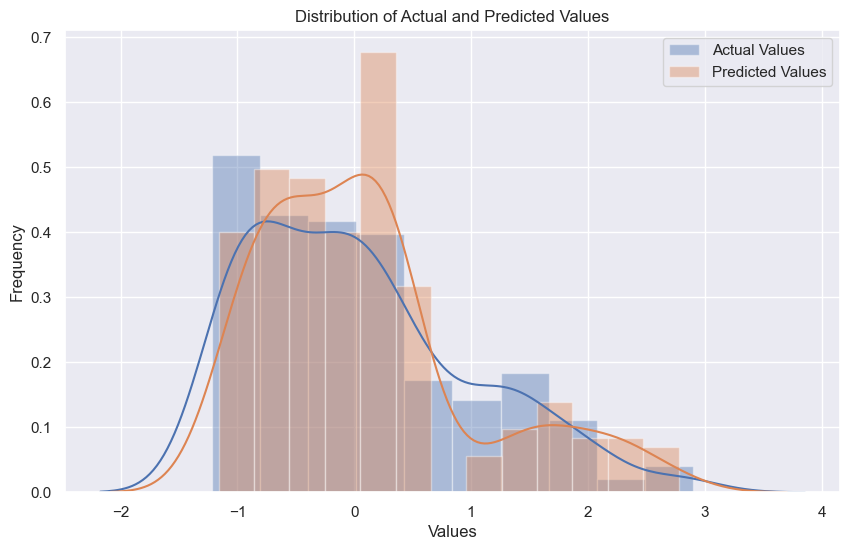


Performance Metrics:
Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.37
R-Squared (R2): 0.60

Model R2: 0.60
Mean Absolute Percentage Error (MAPE): 134.58%


In [87]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the distribution of predicted and actual values
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Values')
sns.distplot(y_pred, label='Predicted Values')
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nPerformance Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

# Calculate the coefficient of determination (R2) using the model's R2 attribute
print(f'\nModel R2: {model.rsquared:.2f}')

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          6.07e-183
Time:                        11:29:42   Log-Likelihood:                 530.95
No. Observations:                 954   AIC:                            -1044.
Df Residuals:                     945   BIC:                            -1000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0531      0.016  

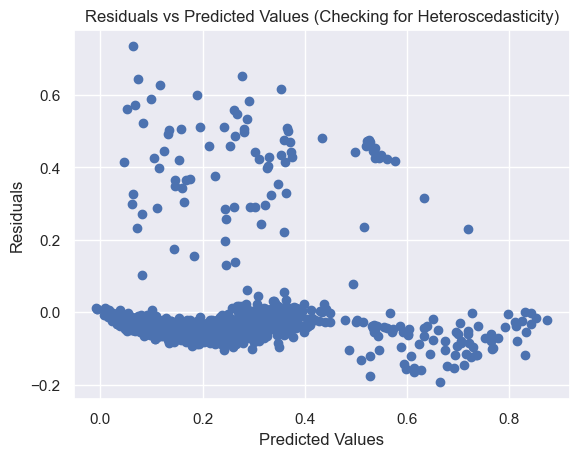

ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS Model on the training data
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train.iloc[:, 1:])
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

# Make predictions using the model
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R2): {r2}")

# Perform hyperparameter tuning using GridSearchCV
lr_model = LinearRegression()
param_grid = {
    'n_jobs': [-1, 1, 2, 4],  # number of jobs for parallel processing
    'copy_X': [True, False]  # whether to copy X or not
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train.iloc[:, 1:], y_train)

print("\nBest hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Final Data Shape: (1193, 9)
Final Data Head:
        age       bmi  children  expenses  sex_male  smoker_yes  \
0  0.021739  0.386364       0.0  0.472641         0           1   
1  0.000000  0.577922       0.2  0.018101         1           0   
2  0.217391  0.551948       0.6  0.099775         1           0   
3  0.326087  0.217532       0.0  0.625547         1           0   
4  0.304348  0.418831       0.0  0.082306         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.604
Model:                            OLS   Adj. R

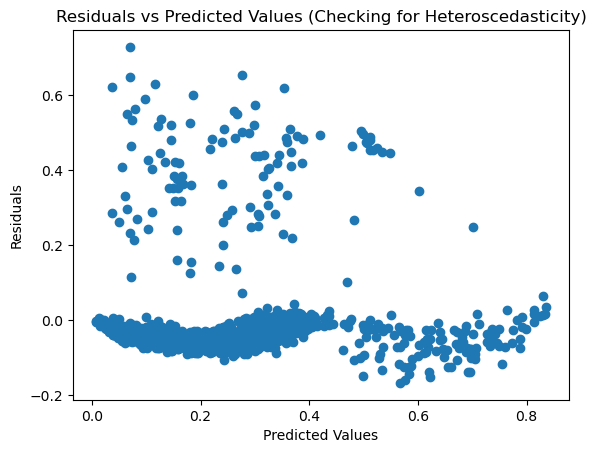


Breusch-Pagan test results:
F-statistic: 16.51201902393128
P-value: 0.035611071252167545

White's test results:
LM-statistic: 93.86486361370217
P-value: 4.6704900394512103e-07

Durbin-Watson statistic: 2.062843493344894


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numerical_cols] = scaler.fit_transform(df_cleaned_scaled[numerical_cols])

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Print the final data shape and head
print("Final Data Shape:", df_cleaned_scaled.shape)
print("Final Data Head:")
print(df_cleaned_scaled.head())

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS Model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X)

# Plot residuals vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# Perform White's test for Heteroscedasticity
white_test = het_white(residuals_wls, sm.add_constant(X))
print("\nWhite's test results:")
print(f"LM-statistic: {white_test[0]}")
print(f"P-value: {white_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

Final Data Shape: (1193, 9)
Final Data Head:
        age       bmi  children  expenses  sex_male  smoker_yes  \
0  0.021739  0.386364       0.0  0.472641         0           1   
1  0.000000  0.577922       0.2  0.018101         1           0   
2  0.217391  0.551948       0.6  0.099775         1           0   
3  0.326087  0.217532       0.0  0.625547         1           0   
4  0.304348  0.418831       0.0  0.082306         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
                            WLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.600
Model:                            WLS   Adj. R

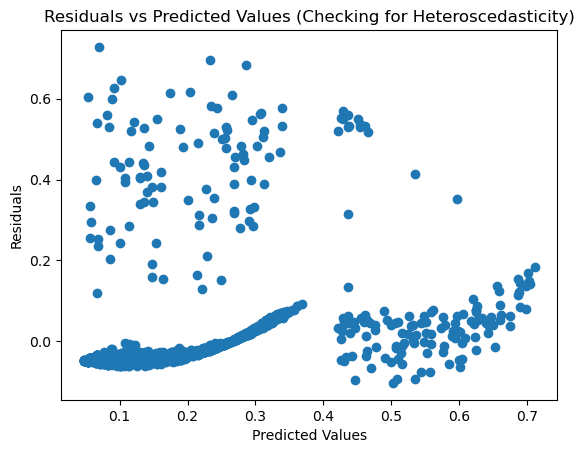


Breusch-Pagan test results:
F-statistic: 17.413616904168173
P-value: 0.026078997602612904

White's test results:
LM-statistic: 93.86486361370217
P-value: 4.6704900394512103e-07

Durbin-Watson statistic (WLS): 1.9745459046224298


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numerical_cols] = scaler.fit_transform(df_cleaned_scaled[numerical_cols])

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Print the final data shape and head
print("Final Data Shape:", df_cleaned_scaled.shape)
print("Final Data Head:")
print(df_cleaned_scaled.head())

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Calculate the weights for WLS
residuals = np.abs(y - np.mean(y))
weights = 1 / (residuals ** 2)

# Fit the WLS model
wls_model = sm.WLS(y, sm.add_constant(X), weights=weights).fit()

# Print the WLS model summary
print(wls_model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data (WLS):")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals_wls = wls_model.resid
y_pred_wls = wls_model.predict(sm.add_constant(X))

# Plot residuals vs predicted values
plt.scatter(y_pred_wls, residuals_wls)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals_wls, sm.add_constant(X))
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# Perform White's test for Heteroscedasticity
white_test = het_white(residuals_wls, sm.add_constant(X))
print("\nWhite's test results:")
print(f"LM-statistic: {white_test[0]}")
print(f"P-value: {white_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic_wls = durbin_watson(residuals_wls)
print(f'\nDurbin-Watson statistic (WLS): {dw_statistic_wls}')

Final Data Shape: (1193, 9)
Final Data Head:
        age       bmi  children  expenses  sex_male  smoker_yes  \
0  0.021739  0.386364       0.0  0.472641         0           1   
1  0.000000  0.577922       0.2  0.018101         1           0   
2  0.217391  0.551948       0.6  0.099775         1           0   
3  0.326087  0.217532       0.0  0.625547         1           0   
4  0.304348  0.418831       0.0  0.082306         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.604
Model:                            OLS   Adj. R

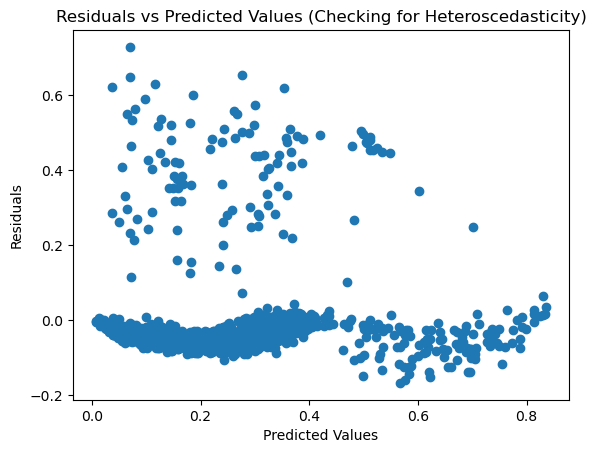


Breusch-Pagan test results:
F-statistic: 16.51201902393128
P-value: 0.035611071252167545

White's test results:
LM-statistic: 68.92481899789017
P-value: 0.0007805245301088243

Durbin-Watson statistic (OLS with robust SE): 2.062843493344894


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numerical_cols] = scaler.fit_transform(df_cleaned_scaled[numerical_cols])

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Print the final data shape and head
print("Final Data Shape:", df_cleaned_scaled.shape)
print("Final Data Head:")
print(df_cleaned_scaled.head())

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Fit the OLS model with robust standard errors
ols_model = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC3')

# Print the OLS model summary with robust standard errors
print(ols_model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data (OLS with robust SE):")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals_ols = ols_model.resid
y_pred_ols = ols_model.predict(sm.add_constant(X))

# Plot residuals vs predicted values
plt.scatter(y_pred_ols, residuals_ols)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals_ols, sm.add_constant(X))
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# Perform White's test for Heteroscedasticity
white_test = het_white(residuals_ols, sm.add_constant(X))
print("\nWhite's test results:")
print(f"LM-statistic: {white_test[0]}")
print(f"P-value: {white_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic_ols = durbin_watson(residuals_ols)
print(f'\nDurbin-Watson statistic (OLS with robust SE): {dw_statistic_ols}')

Final Data Shape: (1193, 9)
Final Data Head:
        age       bmi  children  expenses  sex_male  smoker_yes  \
0  0.021739  0.386364       0.0  0.472641         0           1   
1  0.000000  0.577922       0.2  0.018101         1           0   
2  0.217391  0.551948       0.6  0.099775         1           0   
3  0.326087  0.217532       0.0  0.625547         1           0   
4  0.304348  0.418831       0.0  0.082306         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
                            WLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.600
Model:                            WLS   Adj. R

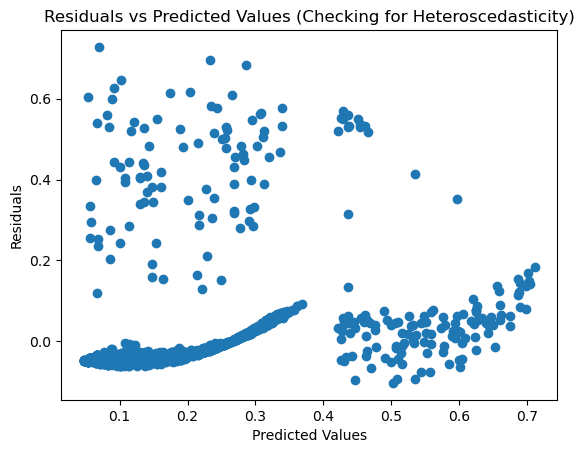


Breusch-Pagan test results:
F-statistic: 17.413616904168173
P-value: 0.026078997602612904

White's test results:
LM-statistic: 93.86486361370217
P-value: 4.6704900394512103e-07

Durbin-Watson statistic (WLS with robust SE): 1.9745459046224298


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numerical_cols] = scaler.fit_transform(df_cleaned_scaled[numerical_cols])

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Print the final data shape and head
print("Final Data Shape:", df_cleaned_scaled.shape)
print("Final Data Head:")
print(df_cleaned_scaled.head())

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Calculate the weights for WLS
residuals = np.abs(y - np.mean(y))
weights = 1 / (residuals ** 2)

# Fit the WLS model with robust standard errors
wls_model = sm.WLS(y, sm.add_constant(X), weights=weights).fit(cov_type='HC3')

# Print the WLS model summary with robust standard errors
print(wls_model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data (WLS with robust SE):")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals_wls = wls_model.resid
y_pred_wls = wls_model.predict(sm.add_constant(X))

# Plot residuals vs predicted values
plt.scatter(y_pred_wls, residuals_wls)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals_wls, sm.add_constant(X))
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# Perform White's test for Heteroscedasticity
white_test = het_white(residuals_wls, sm.add_constant(X))
print("\nWhite's test results:")
print(f"LM-statistic: {white_test[0]}")
print(f"P-value: {white_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic_wls = durbin_watson(residuals_wls)
print(f'\nDurbin-Watson statistic (WLS with robust SE): {dw_statistic_wls}')

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          8.67e-183
Time:                        11:35:41   Log-Likelihood:                 527.86
No. Observations:                 954   AIC:                            -1040.
Df Residuals:                     946   BIC:                            -1001.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0425      0.016  

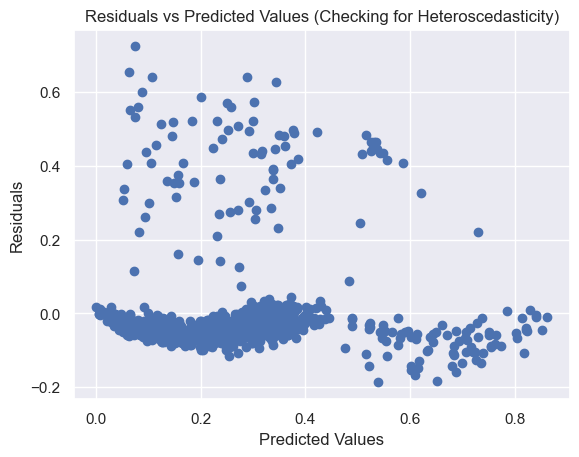


Breusch-Pagan test results:
F-statistic: 18.748167409020994
P-value: 0.009013925343062324

Durbin-Watson statistic: 2.0401410157172646


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the 'sex_male' column
X_train = X_train.drop(columns=['sex_male'])
X_test = X_test.drop(columns=['sex_male'])

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS Model on the training data
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     248.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          1.42e-209
Time:                        11:38:25   Log-Likelihood:                 527.86
No. Observations:                 954   AIC:                            -1040.
Df Residuals:                     946   BIC:                            -1001.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0425      0.015  

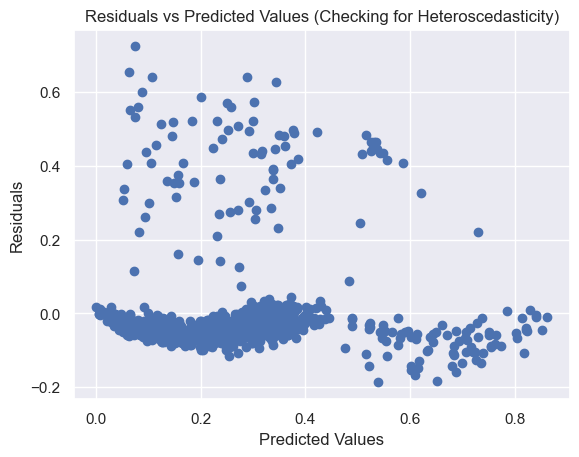


Breusch-Pagan test results:
F-statistic: 18.748167409020994
P-value: 0.009013925343062324

Durbin-Watson statistic: 2.0401410157172646


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the 'ex_male' column
X_train = X_train.drop(columns=['sex_male'])
X_test = X_test.drop(columns=['sex_male'])

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS Model on the training data with robust standard errors
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit(cov_type='HC1')

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

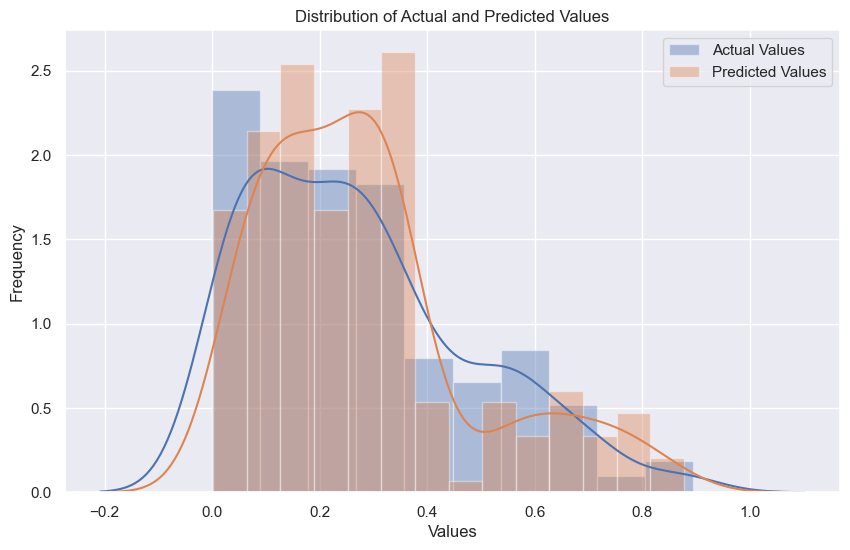


Performance Metrics:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.08
R-Squared (R2): 0.61

Model R2: 0.60
Mean Absolute Percentage Error (MAPE): 135.75%


In [98]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the distribution of predicted and actual values
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Values')
sns.distplot(y_pred, label='Predicted Values')
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nPerformance Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

# Calculate the coefficient of determination (R2) using the model's R2 attribute
print(f'\nModel R2: {model.rsquared:.2f}')

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     292.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          2.11e-211
Time:                        11:42:52   Log-Likelihood:                 526.52
No. Observations:                 954   AIC:                            -1039.
Df Residuals:                     947   BIC:                            -1005.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0319      0.013  

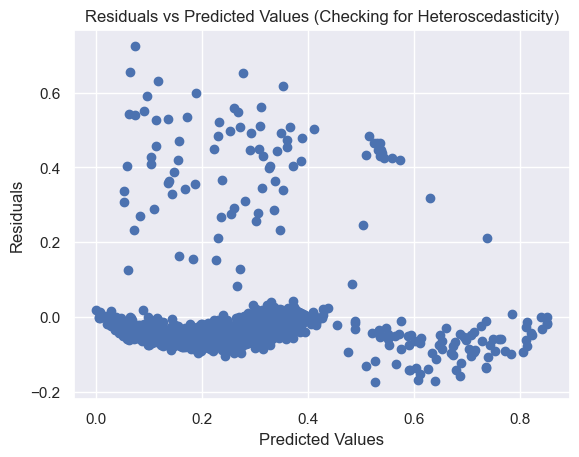


Breusch-Pagan test results:
F-statistic: 18.38623515224516
P-value: 0.005336097936156448

Durbin-Watson statistic: 2.043149974676156


In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Assuming df is your original dataframe

# Dropping outliers using IQR method for numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = ((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[outlier_filter]

# Create dummies for categorical columns
df_cleaned = pd.get_dummies(df_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame
df_cleaned_scaled = pd.DataFrame(df_cleaned_scaled, columns=df_cleaned.columns)

# Convert boolean columns to numerical (0/1)
df_cleaned_scaled = df_cleaned_scaled.astype({col: int for col in df_cleaned_scaled.select_dtypes(include=[bool]).columns})

# Split Data into Features (X) and Target (y)
X = df_cleaned_scaled.drop(columns=['expenses'])  # Features
y = df_cleaned_scaled['expenses']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the 'ex_male' and 'region_northwest' columns
X_train = X_train.drop(columns=['sex_male', 'region_northwest'])
X_test = X_test.drop(columns=['sex_male', 'region_northwest'])

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS Model on the training data with robust standard errors
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit(cov_type='HC1')

# Print model summary
print(model.summary())

# Test for Assumptions

# 1. Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVIF Data:")
print(vif_data)

# 2. Heteroscedasticity (Residuals vs Predicted Values)
residuals = model.resid
y_pred = model.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values (Checking for Heteroscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train)
print("\nBreusch-Pagan test results:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

# 3. Autocorrelation (Durbin-Watson test)
dw_statistic = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw_statistic}')

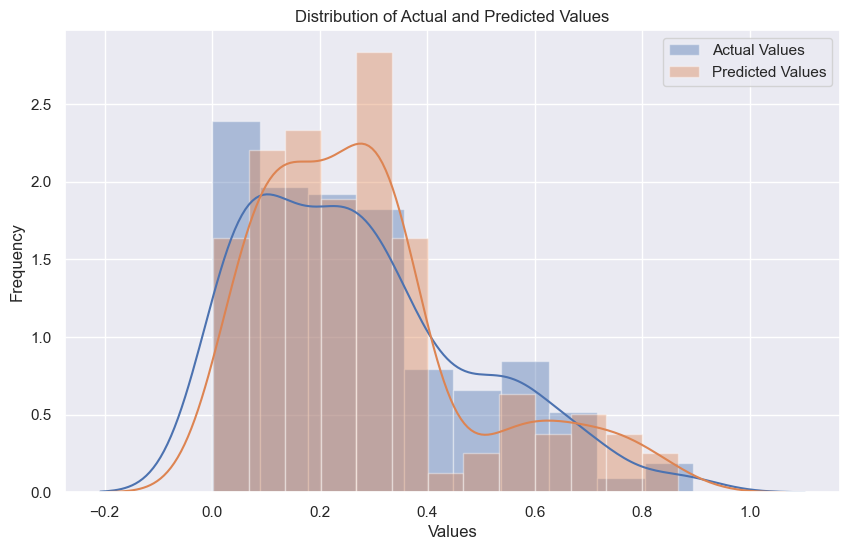


Performance Metrics:
Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.08
R-Squared (R2): 0.62

Model R2: 0.60
Mean Absolute Percentage Error (MAPE): 135.81%


In [100]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the distribution of predicted and actual values
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Values')
sns.distplot(y_pred, label='Predicted Values')
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nPerformance Metrics:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-Squared (R2): {r2:.2f}')

# Calculate the coefficient of determination (R2) using the model's R2 attribute
print(f'\nModel R2: {model.rsquared:.2f}')

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

In [102]:
X=df1.drop(['expenses'],axis=1)
Y=df1['expenses']

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [104]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
x_train_sm

,const,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
621,1.0,1,1,0,0,1,0.413043,0.487871,0.8
194,1.0,1,0,0,1,0,0.000000,0.495957,0.0
240,1.0,0,1,0,0,0,0.108696,0.557951,0.4
1168,1.0,1,0,0,0,1,0.304348,0.517520,0.4
1192,1.0,0,0,0,0,0,0.869565,0.442049,0.2
...,...,...,...,...,...,...,...,...,...
763,1.0,1,0,0,0,0,0.195652,0.269542,0.0
835,1.0,1,0,0,1,0,0.521739,0.539084,0.4
1216,1.0,1,0,0,1,0,0.478261,0.245283,0.0
559,1.0,1,0,1,0,0,0.021739,0.525606,0.0


In [105]:
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          1.81e-301
Time:                        14:15:32   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1887.4220    675.035     -2.796      0.005   -3211.977    -562.867
sex_male           -15.6717    378.186     -0.041      0.967    -757.748     726.405
smoker_yes         2.36e+04    470.592     50.158      0.000    2.27e+04    2.45e+04
region_northwest  -259.4845    550.294     -0.472      0.637   -1339.274     820.305
region_southeast  -913.8673    549.901     -1.662      0.097   -1992.884     165.149
region_southwest  -761.1036    543.291     -1.401      0.162   -1827.151     304.944
age               1.167e+04    622.383     18.749      0.000    1.04e+04    1.29e+04
bmi               1.247e+04   1195.668     10.427      0.000    1.01e+04    1.48e+04
children          2185.8603    782.901      2.792      0.005     649.650    3722.070
==============================================================================
Omnibus:                      256.922   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.429
Skew:                           1.279   Prob(JB):                    1.89e-135
Kurtosis:                       5.716   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
x_train_new=x_train.drop(['sex_male'],axis=1)

In [107]:
x_train_new_sm=sm.add_constant(x_train_new)
x_train_new_sm

,const,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
621,1.0,1,0,0,1,0.413043,0.487871,0.8
194,1.0,0,0,1,0,0.000000,0.495957,0.0
240,1.0,1,0,0,0,0.108696,0.557951,0.4
1168,1.0,0,0,0,1,0.304348,0.517520,0.4
1192,1.0,0,0,0,0,0.869565,0.442049,0.2
...,...,...,...,...,...,...,...,...
763,1.0,0,0,0,0,0.195652,0.269542,0.0
835,1.0,0,0,1,0,0.521739,0.539084,0.4
1216,1.0,0,0,1,0,0.478261,0.245283,0.0
559,1.0,0,1,0,0,0.021739,0.525606,0.0


In [108]:
lr_new=sm.OLS(y_train,x_train_new_sm).fit()
lr_new.params
lr_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     425.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          8.48e-303
Time:                        14:16:21   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1062   BIC:                         2.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1894.4536    653.053     -2.901      0.004   -3175.874    -613.033
smoker_yes         2.36e+04    469.832     50.237      0.000    2.27e+04    2.45e+04
region_northwest  -259.2265    550.001     -0.471      0.638   -1338.438     819.985
region_southeast  -914.1792    549.591     -1.663      0.097   -1992.586     164.228
region_southwest  -760.8997    543.014     -1.401      0.161   -1826.402     304.602
age               1.167e+04    621.934     18.763      0.000    1.04e+04    1.29e+04
bmi               1.247e+04   1194.568     10.435      0.000    1.01e+04    1.48e+04
children          2184.9400    782.218      2.793      0.005     650.072    3719.808
==============================================================================
Omnibus:                      256.958   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.641
Skew:                           1.279   Prob(JB):                    1.70e-135
Kurtosis:                       5.716   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  

In [110]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [111]:
regressor.fit(x_train_new,y_train)

LinearRegression()

In [112]:
r_sq=regressor.score(x_train_new,y_train)
r_sq

0.7370368476962623

In [113]:
intercept=regressor.intercept_
intercept

-1894.4535565811493

In [114]:
x_test=x_test.drop(['sex_male'],axis=1)